Cell 1: Import Required Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np


Cell 2: Load and Merge Data

In [2]:
## Load GeoJSON files
analysis_gdf = gpd.read_file("../data/analysisfile1.geojson")
energy_gdf = gpd.read_file("../data/energyBblMN.geojson")

# Merge data on 'BBL'
merged_gdf = analysis_gdf.merge(energy_gdf, on="BBL")

# Extract relevant columns
merged_gdf["BuildingAge"] = merged_gdf["Bldg_Age"]
merged_gdf["EnergyUse"] = merged_gdf["basenergyfileFINAL_ElectricityCleanDF"]

# Filter extreme values
filtered_gdf = merged_gdf[(merged_gdf["BuildingAge"] <= 500) & (merged_gdf["EnergyUse"] <= 1e7)]
   

Cell 3: Scatter Plot with Color-Coding

C:\Users\fauxi\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


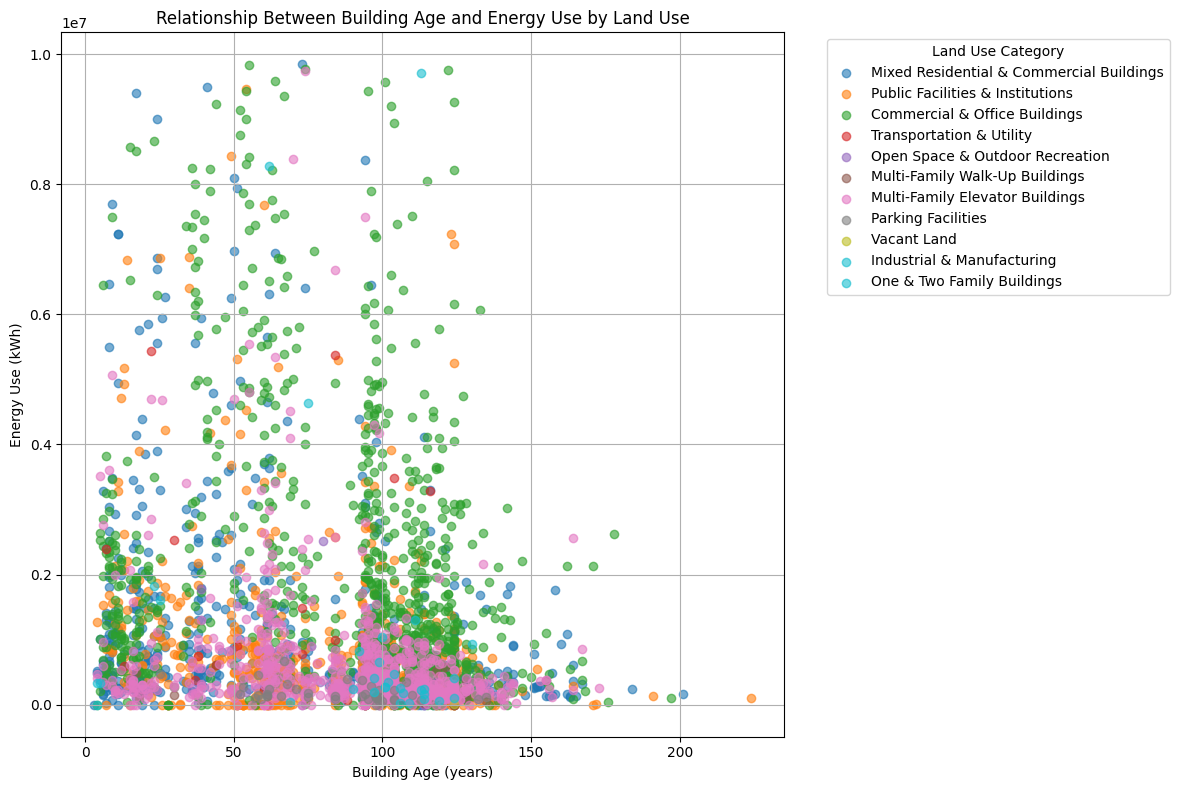

In [3]:
# Define the mapping dictionary for LandUseInt
land_use_mapping = {
    1: "One & Two Family Buildings",
    2: "Multi-Family Walk-Up Buildings",
    3: "Multi-Family Elevator Buildings",
    4: "Mixed Residential & Commercial Buildings",
    5: "Commercial & Office Buildings",
    6: "Industrial & Manufacturing",
    7: "Transportation & Utility",
    8: "Public Facilities & Institutions",
    9: "Open Space & Outdoor Recreation",
    10: "Parking Facilities",
    11: "Vacant Land"
}

# Replace numeric LandUseInt with descriptive labels
filtered_gdf["LandUseCategory"] = filtered_gdf["LandUseInt"].map(land_use_mapping)

# Color-coded scatter plot
plt.figure(figsize=(12, 8))

# Get unique land use categories
categories = filtered_gdf["LandUseCategory"].unique()

# Define a color map for categories
colors = plt.cm.tab10(range(len(categories)))

# Plot each category
for i, category in enumerate(categories):
    subset = filtered_gdf[filtered_gdf["LandUseCategory"] == category]
    plt.scatter(
        subset["BuildingAge"],
        subset["EnergyUse"],
        color=colors[i],
        alpha=0.6,
        label=category
    )

plt.title("Relationship Between Building Age and Energy Use by Land Use")
plt.xlabel("Building Age (years)")
plt.ylabel("Energy Use (kWh)")
plt.grid(True)
plt.legend(title="Land Use Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()  # Adjust layout for better display
plt.show()


Add Log Scale and Trendline for Each Category

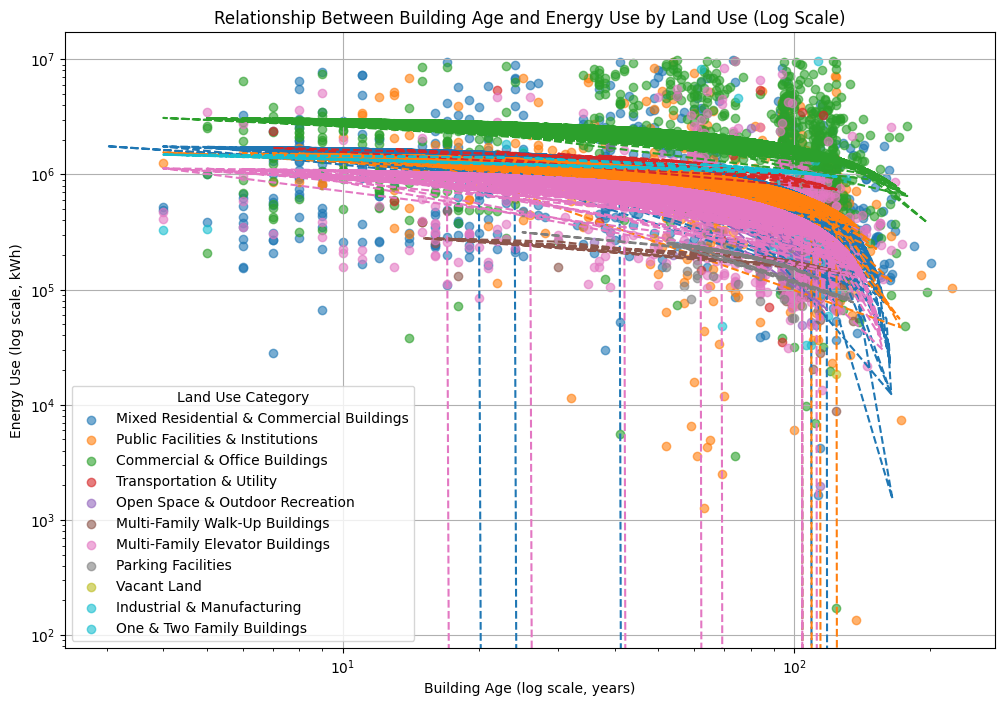

In [4]:
plt.figure(figsize=(12, 8))

# Plot each category and add trendlines
for i, category in enumerate(categories):
    subset = filtered_gdf[filtered_gdf["LandUseCategory"] == category]
    x = subset["BuildingAge"]
    y = subset["EnergyUse"]
    
    # Scatter plot for the category
    plt.scatter(x, y, color=colors[i], alpha=0.6, label=category)
    
    # Add trendline
    if len(x) > 1:  # Ensure there's enough data for a trendline
        slope, intercept, _, _, _ = linregress(x, y)
        plt.plot(x, slope * x + intercept, color=colors[i], linestyle="dashed")

# Apply log scale
plt.xscale('log')
plt.yscale('log')

plt.title("Relationship Between Building Age and Energy Use by Land Use (Log Scale)")
plt.xlabel("Building Age (log scale, years)")
plt.ylabel("Energy Use (log scale, kWh)")
plt.grid(True)
plt.legend(title="Land Use Category")
plt.show()


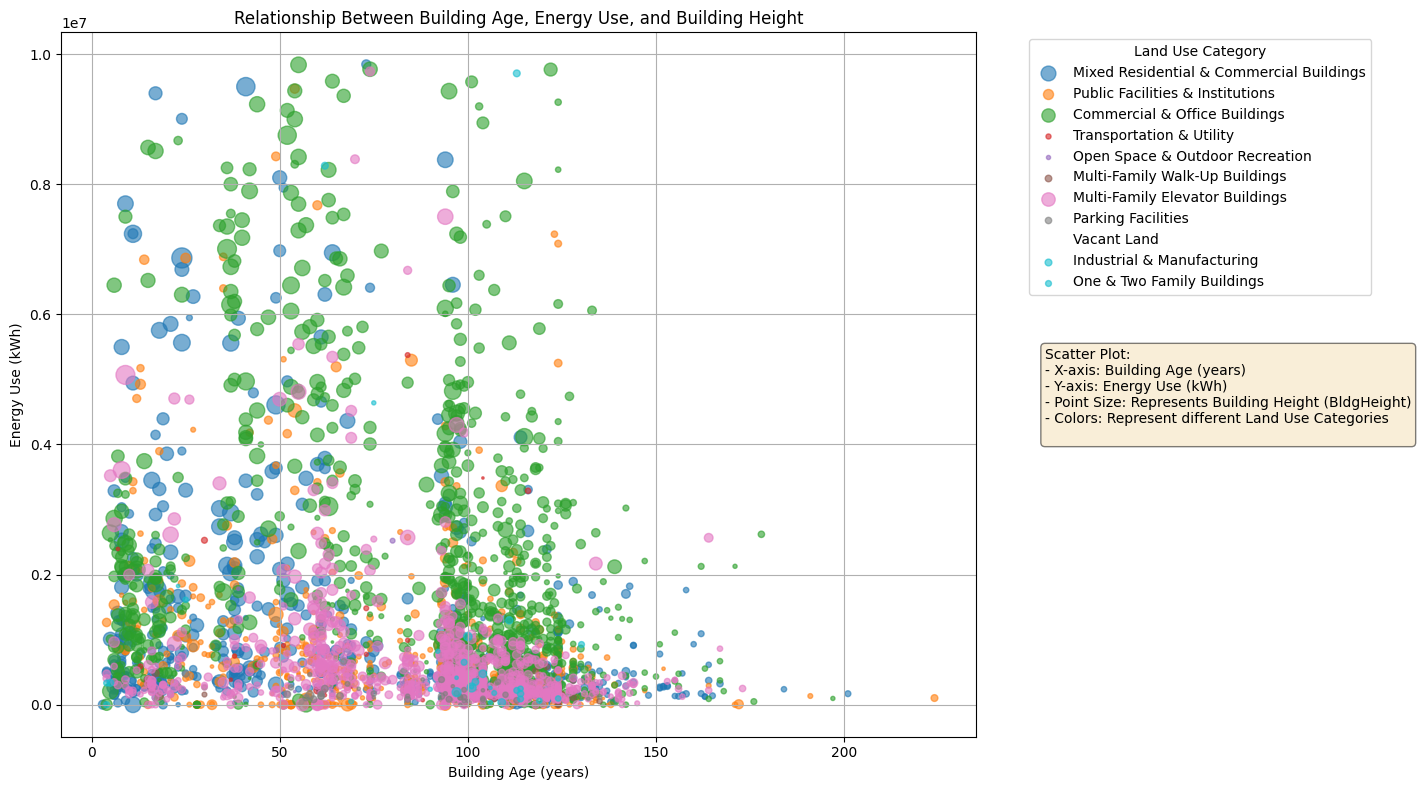

In [5]:
# Define the mapping dictionary for LandUseInt
land_use_mapping = {
    1: "One & Two Family Buildings",
    2: "Multi-Family Walk-Up Buildings",
    3: "Multi-Family Elevator Buildings",
    4: "Mixed Residential & Commercial Buildings",
    5: "Commercial & Office Buildings",
    6: "Industrial & Manufacturing",
    7: "Transportation & Utility",
    8: "Public Facilities & Institutions",
    9: "Open Space & Outdoor Recreation",
    10: "Parking Facilities",
    11: "Vacant Land"
}

# Ensure filtered_gdf is a copy and avoid SettingWithCopyWarning
filtered_gdf = filtered_gdf.copy()

# Replace numeric LandUseInt with descriptive labels
filtered_gdf["LandUseCategory"] = filtered_gdf["LandUseInt"].map(land_use_mapping)

# Scatter plot with point size for building height
plt.figure(figsize=(14, 8))

# Get unique land use categories
categories = filtered_gdf["LandUseCategory"].unique()

# Define a color map for categories
colors = plt.cm.tab10(range(len(categories)))

# Plot each category with building height as point size
for i, category in enumerate(categories):
    subset = filtered_gdf[filtered_gdf["LandUseCategory"] == category]
    plt.scatter(
        subset["BuildingAge"],
        subset["EnergyUse"],
        s=subset["BldgHeight"],  # Use the correct column name for building height
        color=colors[i],
        alpha=0.6,
        label=category
    )

# Add title and labels
plt.title("Relationship Between Building Age, Energy Use, and Building Height")
plt.xlabel("Building Age (years)")
plt.ylabel("Energy Use (kWh)")

# Add plot description as a text box on the right
description = (
    "Scatter Plot:\n"
    "- X-axis: Building Age (years)\n"
    "- Y-axis: Energy Use (kWh)\n"
    "- Point Size: Represents Building Height (BldgHeight)\n"
    "- Colors: Represent different Land Use Categories\n"
)
plt.gcf().text(
    0.75, 0.5, description, fontsize=10, va="center", ha="left",
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5)
)

# Add legend
plt.legend(title="Land Use Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()  # Adjust layout for better display
plt.show()


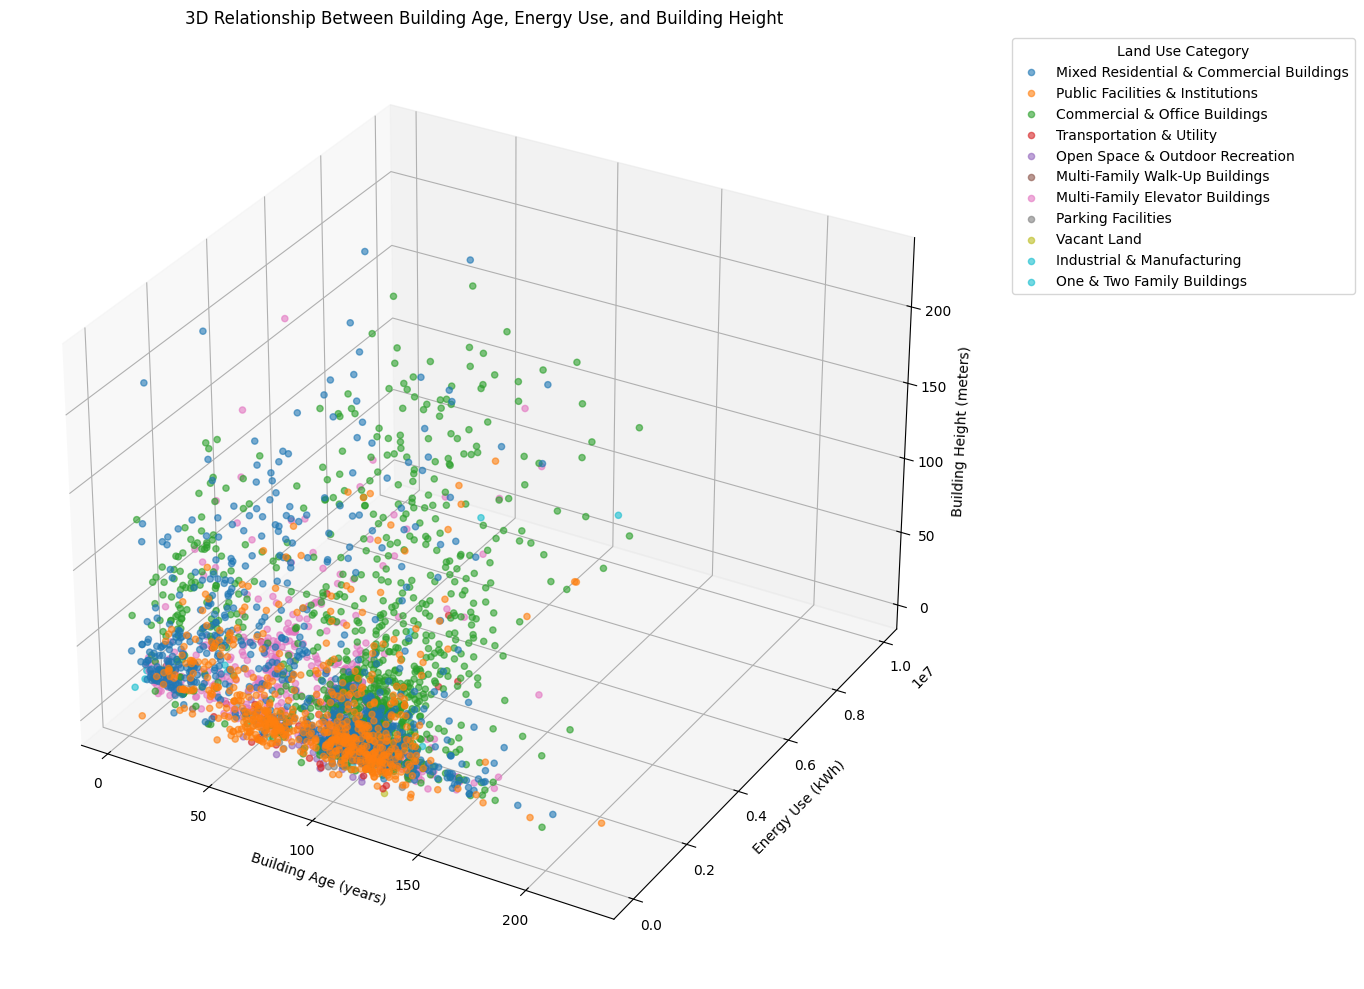

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Define the mapping dictionary for LandUseInt
land_use_mapping = {
    1: "One & Two Family Buildings",
    2: "Multi-Family Walk-Up Buildings",
    3: "Multi-Family Elevator Buildings",
    4: "Mixed Residential & Commercial Buildings",
    5: "Commercial & Office Buildings",
    6: "Industrial & Manufacturing",
    7: "Transportation & Utility",
    8: "Public Facilities & Institutions",
    9: "Open Space & Outdoor Recreation",
    10: "Parking Facilities",
    11: "Vacant Land"
}

# Ensure filtered_gdf is a copy and avoid SettingWithCopyWarning
filtered_gdf = filtered_gdf.copy()

# Replace numeric LandUseInt with descriptive labels
filtered_gdf["LandUseCategory"] = filtered_gdf["LandUseInt"].map(land_use_mapping)

# 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")

# Get unique land use categories
categories = filtered_gdf["LandUseCategory"].unique()

# Define a color map for categories
colors = plt.cm.tab10(range(len(categories)))

# Plot each category
for i, category in enumerate(categories):
    subset = filtered_gdf[filtered_gdf["LandUseCategory"] == category]
    ax.scatter(
        subset["BuildingAge"],  # X-axis
        subset["EnergyUse"],    # Y-axis
        subset["BldgHeight"],   # Z-axis
        color=colors[i],
        alpha=0.6,
        label=category
    )

# Add labels and title
ax.set_title("3D Relationship Between Building Age, Energy Use, and Building Height")
ax.set_xlabel("Building Age (years)")
ax.set_ylabel("Energy Use (kWh)")
ax.set_zlabel("Building Height (meters)")

# Add legend
ax.legend(title="Land Use Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()  # Adjust layout for better display

# Show the plot
plt.show()


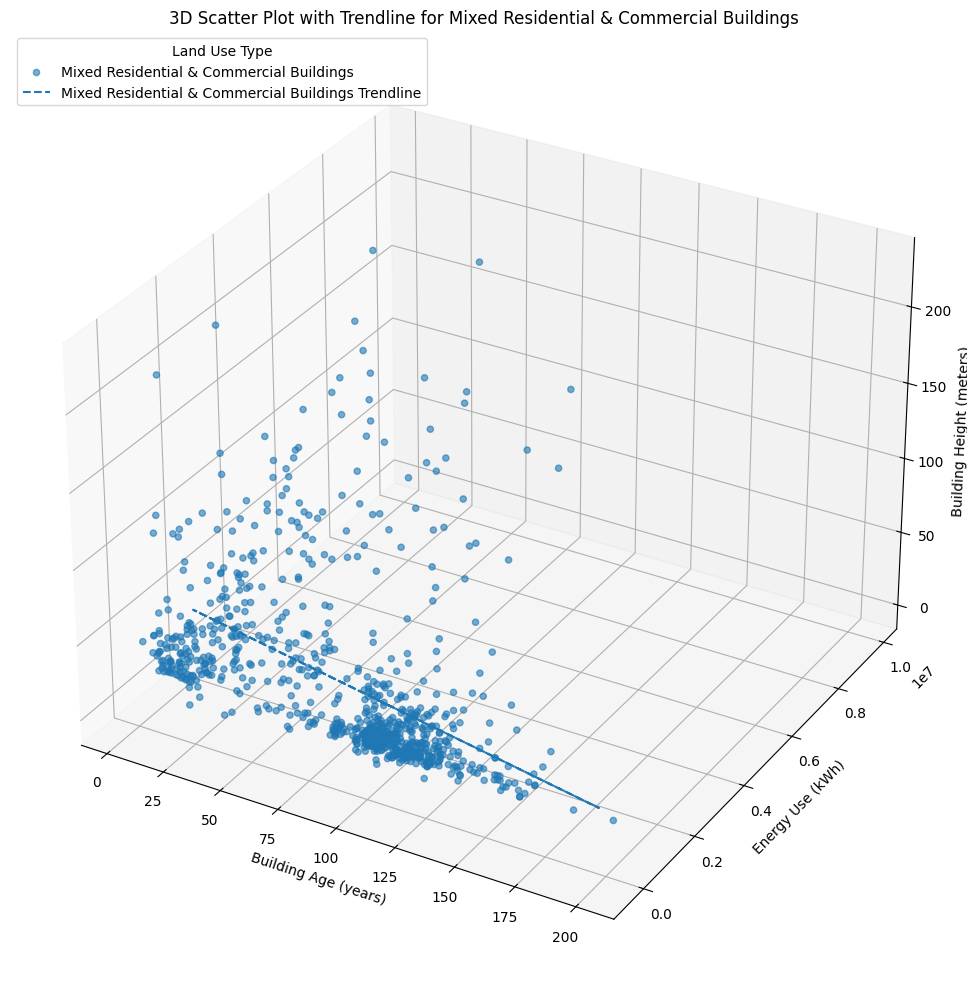

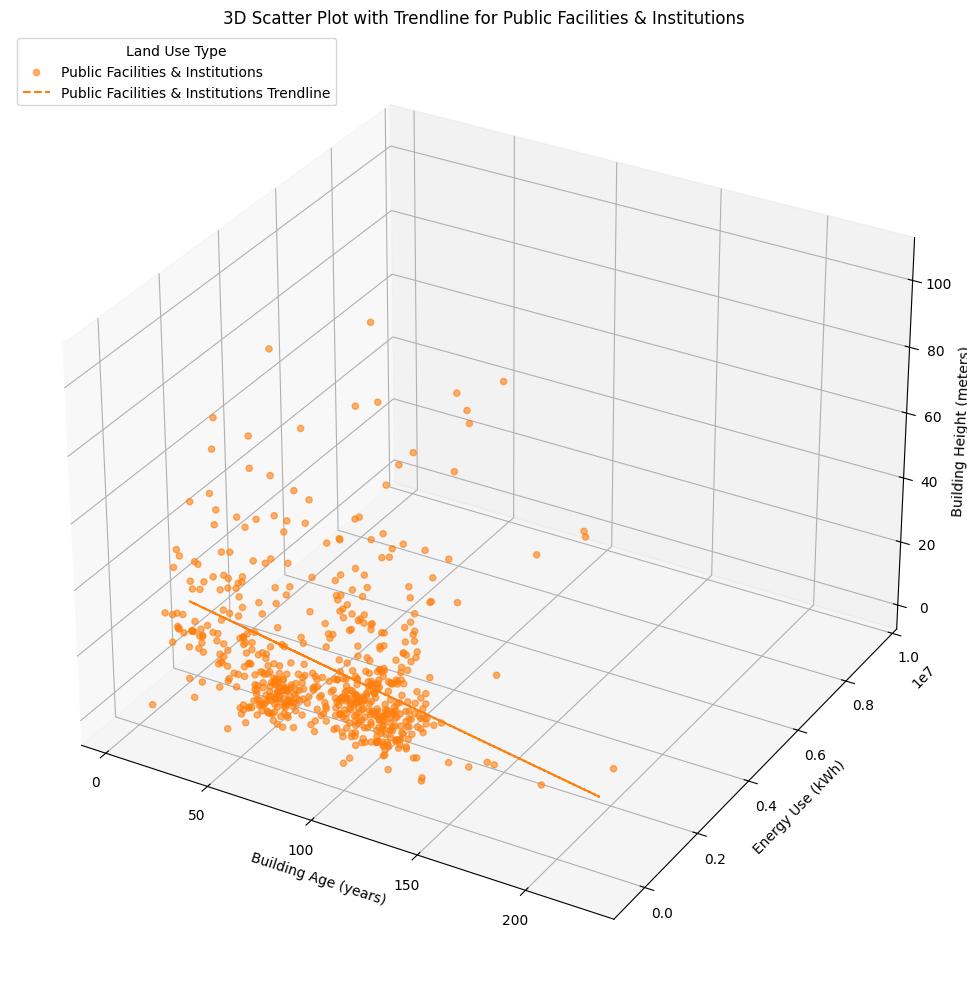

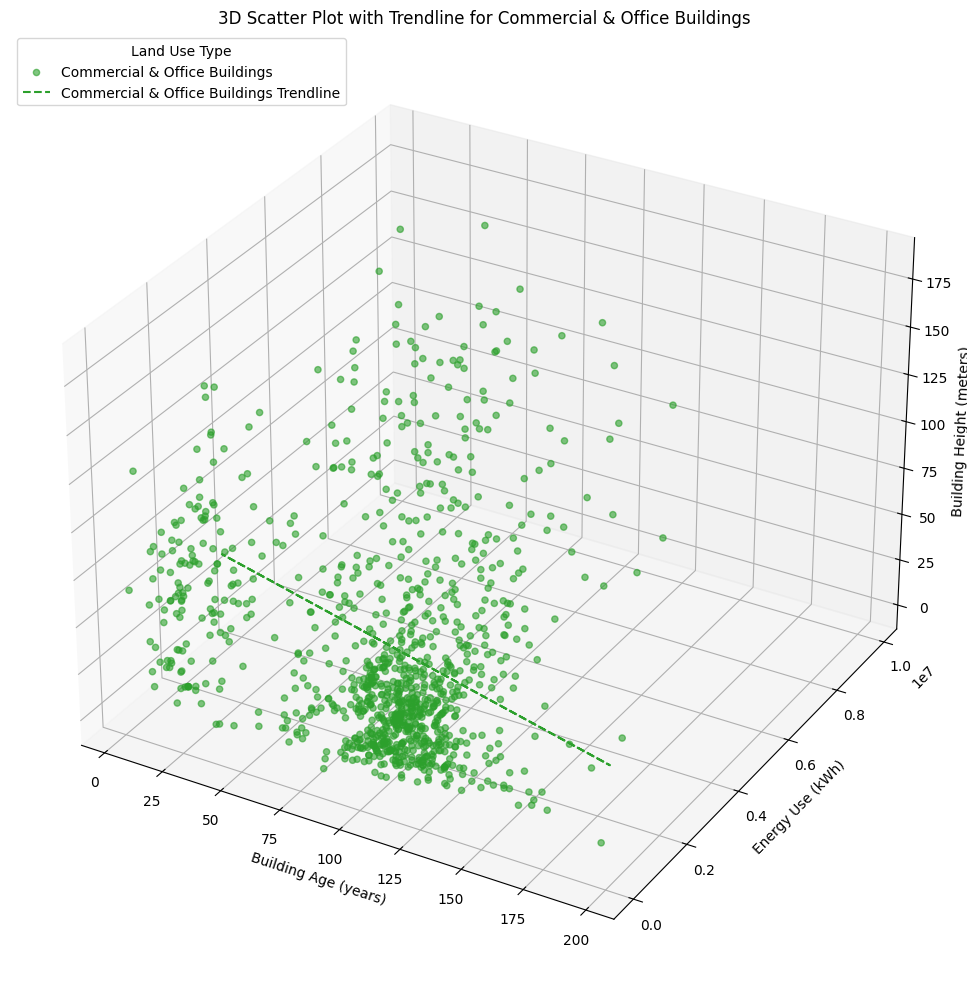

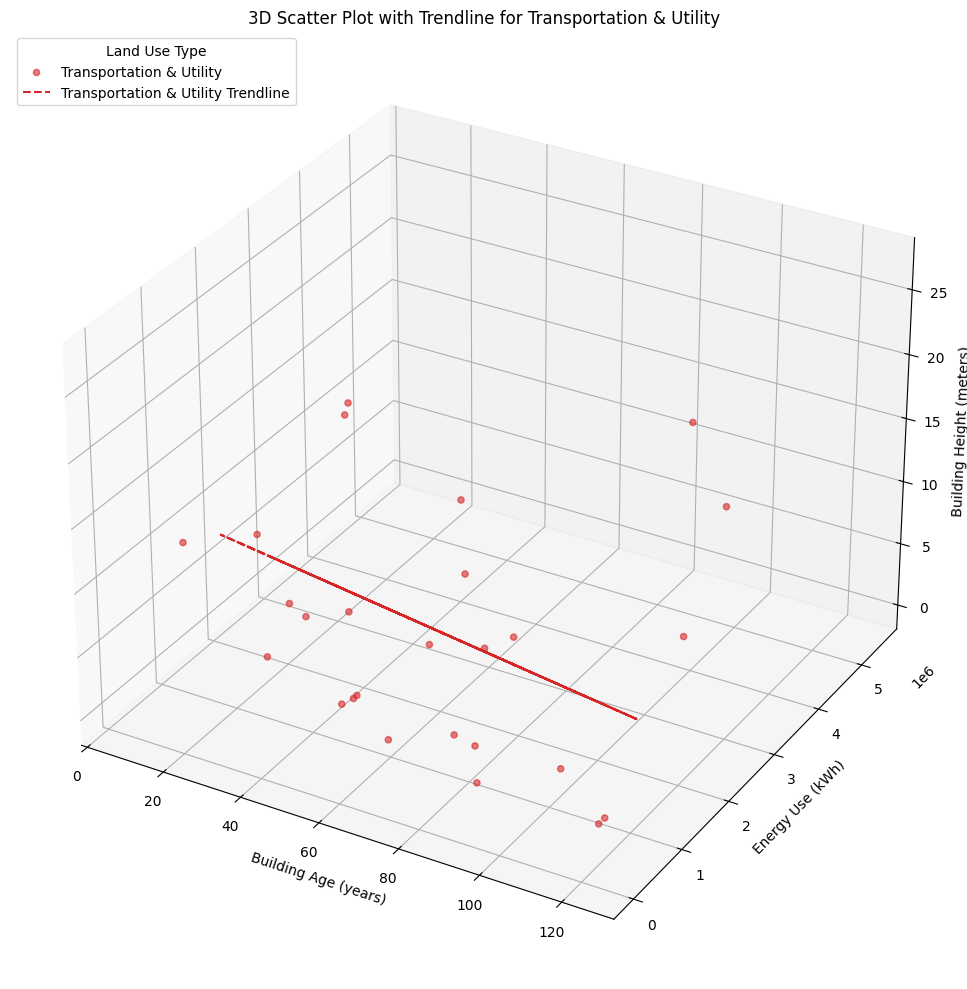

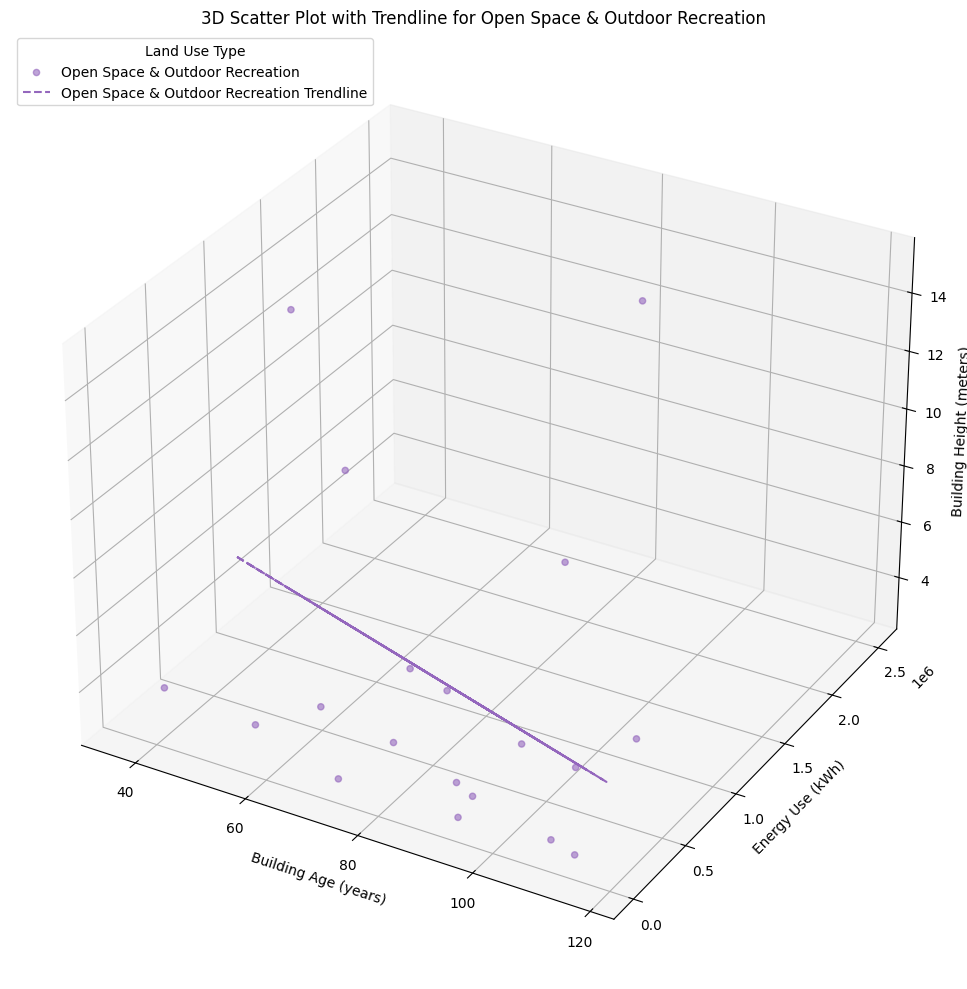

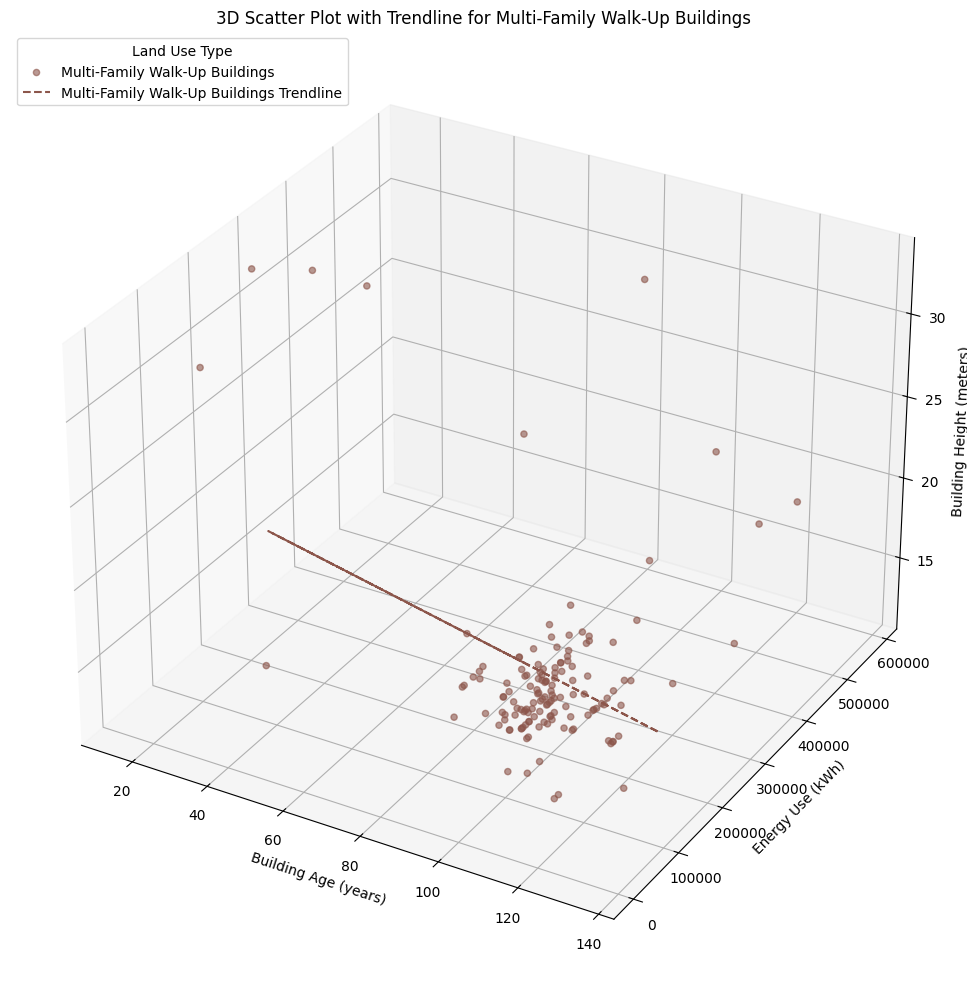

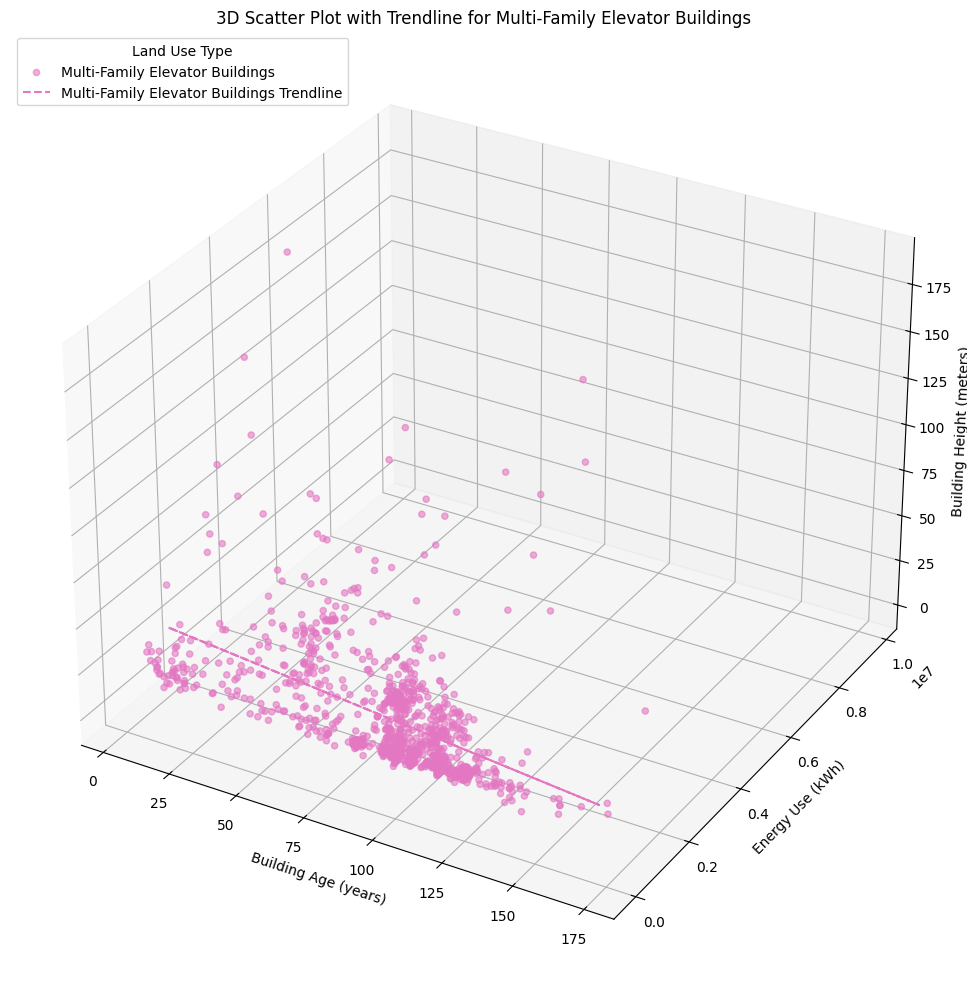

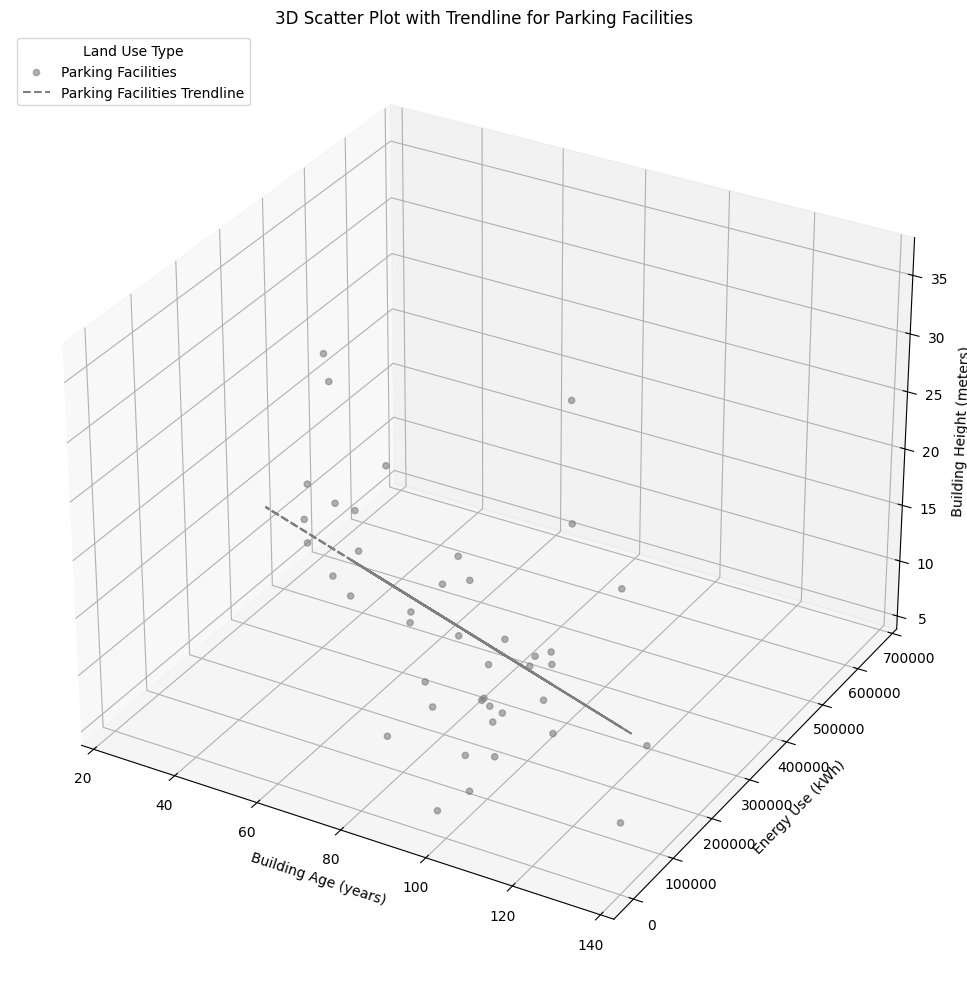

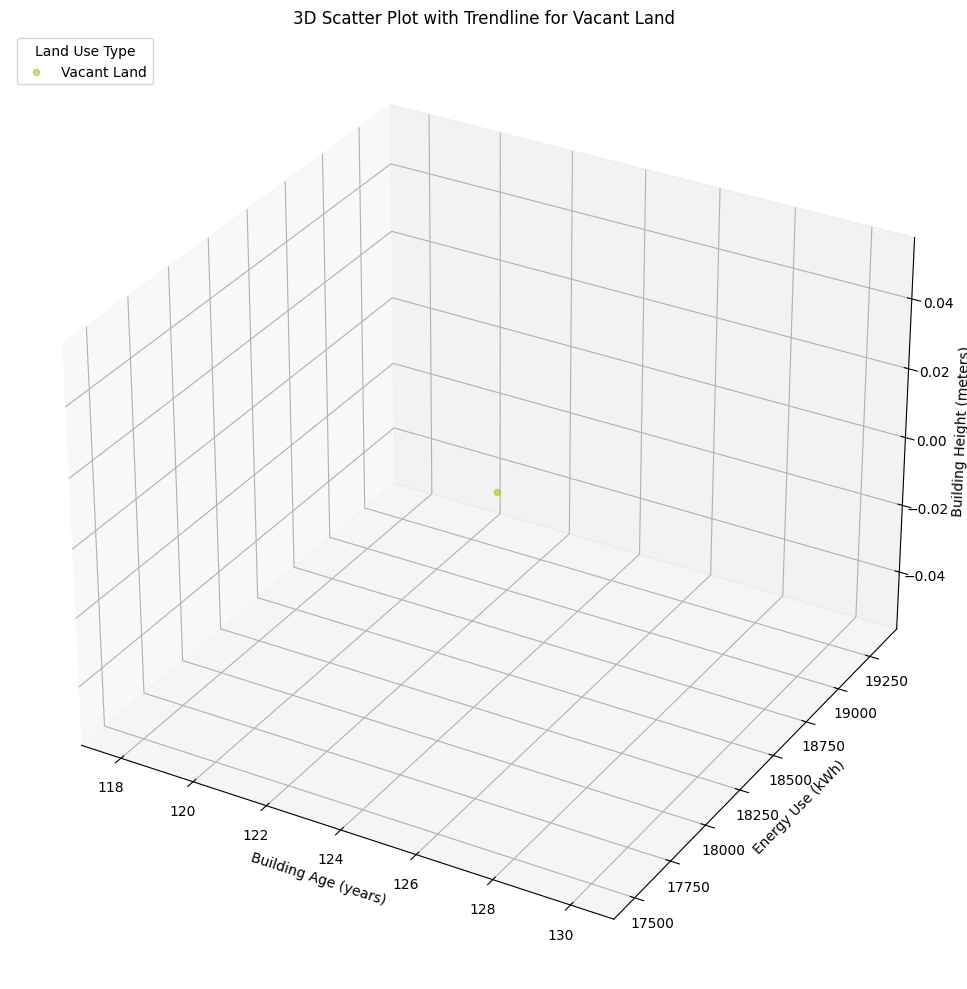

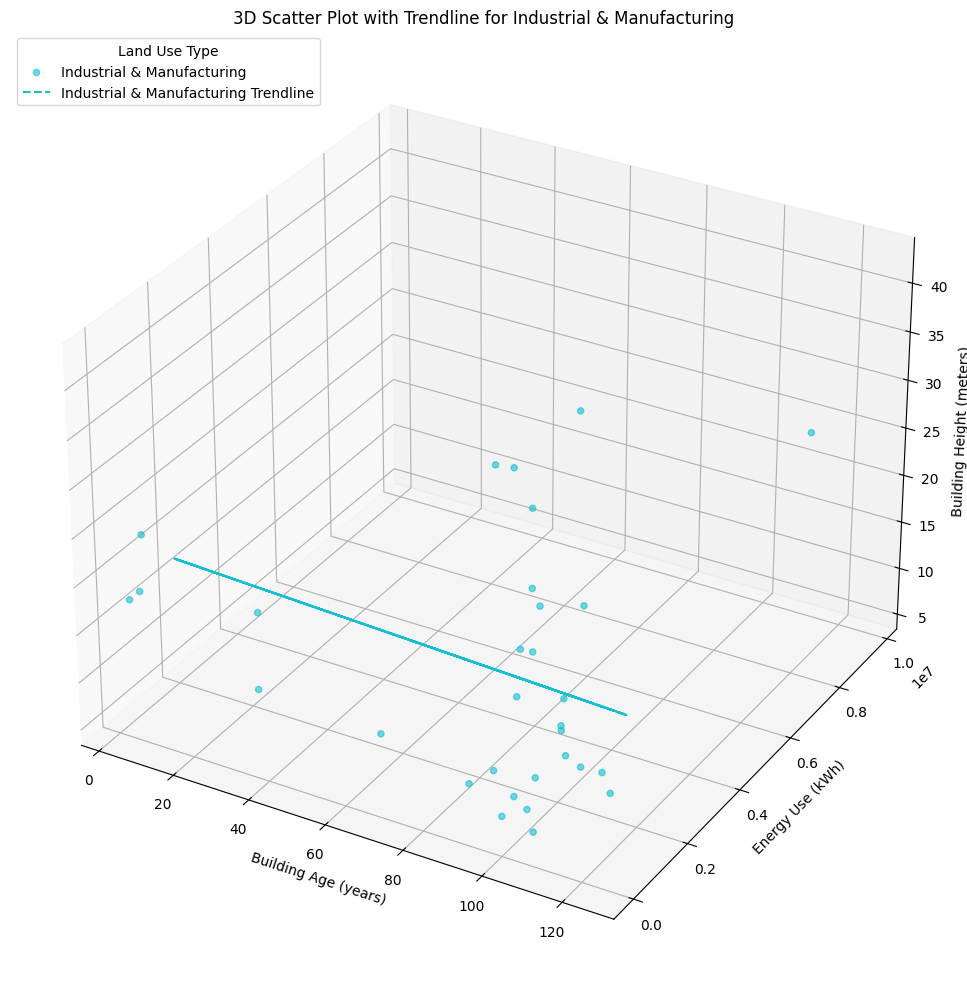

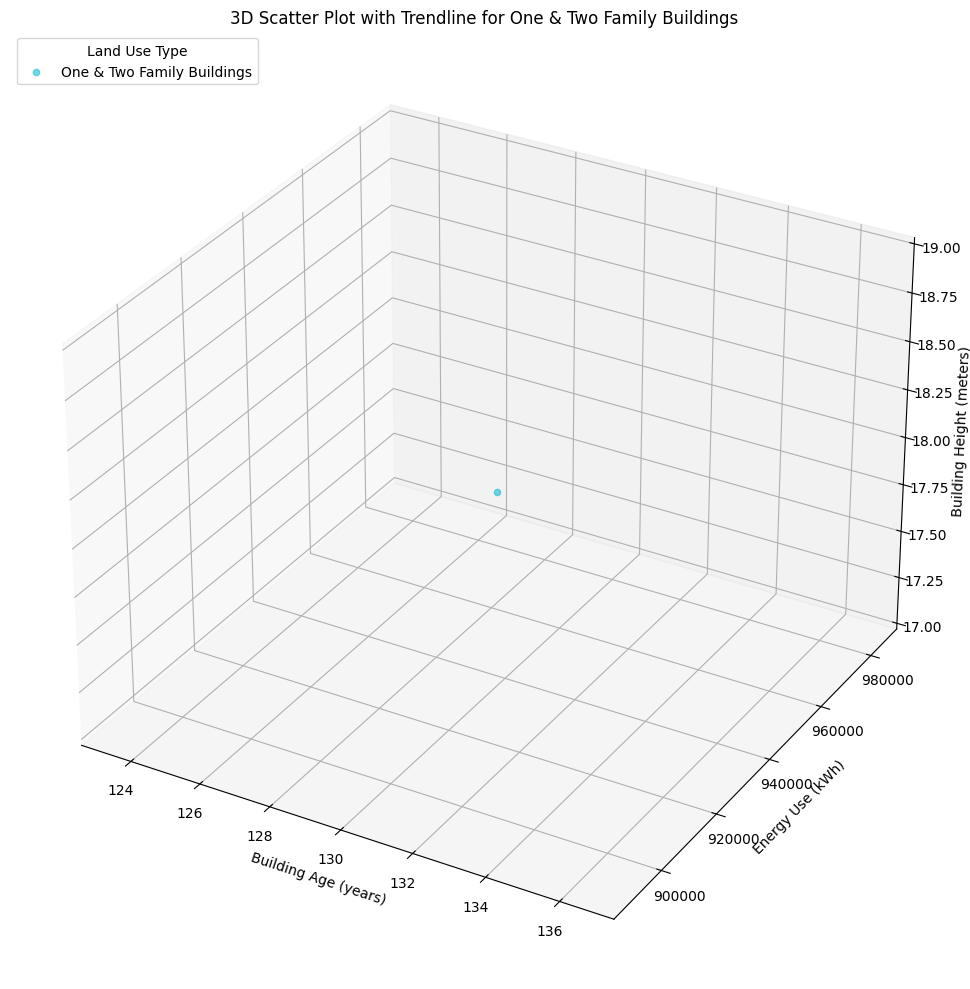

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.stats import linregress  # For trendlines

# Define the mapping dictionary for LandUseInt
land_use_mapping = {
    1: "One & Two Family Buildings",
    2: "Multi-Family Walk-Up Buildings",
    3: "Multi-Family Elevator Buildings",
    4: "Mixed Residential & Commercial Buildings",
    5: "Commercial & Office Buildings",
    6: "Industrial & Manufacturing",
    7: "Transportation & Utility",
    8: "Public Facilities & Institutions",
    9: "Open Space & Outdoor Recreation",
    10: "Parking Facilities",
    11: "Vacant Land"
}

# Ensure filtered_gdf is a copy and avoid SettingWithCopyWarning
filtered_gdf = filtered_gdf.copy()

# Replace numeric LandUseInt with descriptive labels
filtered_gdf["LandUseCategory"] = filtered_gdf["LandUseInt"].map(land_use_mapping)

# Get unique land use categories for filtering
categories = filtered_gdf["LandUseCategory"].unique()

# Define a color map for categories
colors = plt.cm.tab10(range(len(categories)))
color_map = dict(zip(categories, colors))

# Plot each category in separate 3D scatter plots
for category in categories:
    subset = filtered_gdf[filtered_gdf["LandUseCategory"] == category]
    
    # Create 3D scatter plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection="3d")
    
    # Scatter plot
    ax.scatter(
        subset["BuildingAge"],  # X-axis
        subset["EnergyUse"],    # Y-axis
        subset["BldgHeight"],   # Z-axis
        alpha=0.6,
        label=category,
        color=color_map[category]
    )
    
    # Add trendline
    if len(subset) > 2:  # Ensure enough points for trendline
        # Fit a regression line between BuildingAge and EnergyUse
        slope, intercept, _, _, _ = linregress(subset["BuildingAge"], subset["EnergyUse"])
        trend_x = subset["BuildingAge"]
        trend_y = slope * trend_x + intercept
        trend_z = subset["BldgHeight"].mean()  # Use average height for trendline
        
        ax.plot(
            trend_x, trend_y, trend_z,
            color=color_map[category],
            linestyle="dashed",
            label=f"{category} Trendline"
        )
    
    # Add labels and title
    ax.set_title(f"3D Scatter Plot with Trendline for {category}")
    ax.set_xlabel("Building Age (years)")
    ax.set_ylabel("Energy Use (kWh)")
    ax.set_zlabel("Building Height (meters)")
    
    # Add legend
    ax.legend(title="Land Use Type", loc="upper left")
    
    plt.tight_layout()
    plt.show()


In [8]:
filtered_gdf

BBL  Latitude_x  Longitude_x  Bldg_Age  LandUseInt  \
13     1.000978e+09   40.707608   -74.002359     114.0         4.0   
15     1.000978e+09   40.707805   -74.002464      35.0         8.0   
20     1.001008e+09   40.710970   -74.005678      17.0         4.0   
28     1.001060e+09   40.708634   -74.001930      74.0         8.0   
35     1.001068e+09   40.708695   -74.001620     138.0         4.0   
...             ...         ...          ...       ...         ...   
42109  1.022480e+09   40.868016   -73.926011      99.0         3.0   
42116  1.022500e+09   40.871725   -73.919242      71.0         3.0   
42120  1.022500e+09   40.872189   -73.919021      94.0         3.0   
42124  1.022500e+09   40.872432   -73.917708      98.0         3.0   
42125  1.022500e+09   40.872287   -73.918001      94.0         3.0   

       BldgHeight                                         geometry_x  \
13             15  MULTIPOLYGON (((-74.00217 40.70758, -74.0024 4...   
15             18  MULTIPOLYGON (((-74.00224 40.70779, -74.00231 ...   
20            228  MULTIPOLYGON (((-74.00519 40.71094, -74.0056 4...   
28             21  MULTIPOLYGON (((-74.00201 40.70876, -74.00196 ...   
35             21  MULTIPOLYGON (((-74.00154 40.70852, -74.00184 ...   
...           ...                                                ...   
42109          18  MULTIPOLYGON (((-73.92585 40.86825, -73.92569 ...   
42116          18  MULTIPOLYGON (((-73.91897 40.87171, -73.91925 ...   
42120          18  MULTIPOLYGON (((-73.91873 40.87216, -73.91871 ...   
42124          18  MULTIPOLYGON (((-73.91773 40.87224, -73.91798 ...   
42125          18  MULTIPOLYGON (((-73.91805 40.87238, -73.91798 ...   

       Latitude_y  Longitude_y basenergyfileFINAL_Postal Code  \
13      40.707608   -74.002359                          10038   
15      40.707805   -74.002464                          10038   
20      40.710970   -74.005678                          10018   
28      40.708634   -74.001930                          10038   
35      40.708695   -74.001620                          10038   
...           ...          ...                            ...   
42109   40.868016   -73.926011                          10034   
42116   40.871725   -73.919242                          10034   
42120   40.872189   -73.919021                          10034   
42124   40.872432   -73.917708                          10034   
42125   40.872287   -73.918001                          10034   

       basenergyfileFINAL_Latitude  basenergyfileFINAL_Longitude  \
13                       40.707427                    -74.002352   
15                       40.707981                    -74.002471   
20                       40.711132                    -74.005277   
28                       40.708766                    -74.002406   
35                       40.708505                    -74.001454   
...                            ...                           ...   
42109                    40.867882                    -73.925639   
42116                    40.871780                    -73.918931   
42120                    40.871852                    -73.918981   
42124                    40.872026                    -73.917831   
42125                    40.871911                    -73.917987   

       basenergyfileFINAL_ElectricityCleanDF  \
13                                  469167.9   
15                                  427526.0   
20                                 1770799.9   
28                                 1339999.8   
35                                   42069.0   
...                                      ...   
42109                               238141.0   
42116                               178806.0   
42120                               249681.0   
42124                               220956.0   
42125                               148059.0   

                                              geometry_y  BuildingAge  \
13     MULTIPOLYGON (((-74.00217 40.70758, -74.0024 4...      

3D interactive scatter plot 

In [13]:
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import linregress
import plotly.io as pio

# Force Plotly to render in the browser
pio.renderers.default = "browser"

# Define the broader mapping dictionary
land_use_mapping = {
    1: "One & Two Family Buildings",
    2: "Multi-Family Walk-Up Buildings",
    3: "Multi-Family Elevator Buildings",
    4: "Mixed Residential & Commercial Buildings",
    5: "Commercial & Office Buildings",
    6: "Industrial & Manufacturing",
    7: "Transportation & Utility",
    8: "Public Facilities & Institutions",
    9: "Open Space & Outdoor Recreation",
    10: "Parking Facilities",
    11: "Vacant Land"
}

# Ensure filtered_gdf is a copy
filtered_gdf = filtered_gdf.copy()

# Replace numeric LandUseInt with descriptive labels
filtered_gdf["LandUseCategory"] = filtered_gdf["LandUseInt"].map(land_use_mapping)

# Replace null values with 0 in relevant columns
columns_to_clean = ["BuildingAge", "EnergyUse", "BldgHeight", "LandUseInt", "Bldg_Age", "Values", 
    "basenergyfileFINAL_ElectricityCleanDF", "basenergyfileFINAL_NetCo2CleanDF", ]  # Add necessary columns
for column in columns_to_clean:
    if column in filtered_gdf.columns:
        filtered_gdf[column] = filtered_gdf[column].fillna(0)




In [14]:
# Dynamically generate a color map
if "LandUseCategory" not in filtered_gdf.columns:
    raise KeyError("The 'LandUseCategory' column is missing from the dataset.")

unique_categories = filtered_gdf["LandUseCategory"].unique()
colors = px.colors.qualitative.Set1  # Use Plotly's predefined color scheme

# Ensure the color map has enough unique colors for all categories
if len(unique_categories) > len(colors):
    print("Warning: Not enough predefined colors; some categories will share colors.")
color_map = {category: colors[i % len(colors)] for i, category in enumerate(unique_categories)}

# Check if all categories have colors assigned
print("Generated color map:", color_map)

# Create a 3D scatter plot for each category
fig = go.Figure()

for category in unique_categories:
    subset = filtered_gdf[filtered_gdf["LandUseCategory"] == category]
    
    # Add data points
    fig.add_trace(go.Scatter3d(
        x=subset["BuildingAge"],  # X-axis
        y=subset["EnergyUse"],    # Y-axis
        z=subset["BldgHeight"],   # Z-axis
        mode='markers',
        marker=dict(
            size=6,
            color=color_map.get(category, "gray"),  # Use gray as a fallback color
            opacity=0.7
        ),
        name=category
    ))
    
    # Add trendline
    if len(subset) > 2:  # Ensure enough points for a trendline
        slope, intercept, _, _, _ = linregress(subset["BuildingAge"], subset["EnergyUse"])
        trend_x = subset["BuildingAge"]
        trend_y = slope * trend_x + intercept
        trend_z = [subset["BldgHeight"].mean()] * len(trend_x)
        
        fig.add_trace(go.Scatter3d(
            x=trend_x,
            y=trend_y,
            z=trend_z,
            mode='lines',
            line=dict(
                color=color_map.get(category, "gray"),
                dash='dash'
            ),
            name=f"{category} Trendline"
        ))

# Update layout
fig.update_layout(
    title="Interactive 3D Scatter Plot of Building Age, Energy Use, and Height",
    scene=dict(
        xaxis_title="Building Age (years)",
        yaxis_title="Energy Use (kWh)",
        zaxis_title="Building Height (meters)"
    ),
    legend_title="Land Use Category",
    template="plotly_white"
)

# Save as HTML and display
fig.write_html("scatter_plot.html")
fig.show()


Generated color map: {'Mixed Residential & Commercial Buildings': 'rgb(228,26,28)', 'Public Facilities & Institutions': 'rgb(55,126,184)', 'Commercial & Office Buildings': 'rgb(77,175,74)', 'Transportation & Utility': 'rgb(152,78,163)', 'Open Space & Outdoor Recreation': 'rgb(255,127,0)', 'Multi-Family Walk-Up Buildings': 'rgb(255,255,51)', 'Multi-Family Elevator Buildings': 'rgb(166,86,40)', 'Parking Facilities': 'rgb(247,129,191)', 'Vacant Land': 'rgb(153,153,153)', 'Industrial & Manufacturing': 'rgb(228,26,28)', 'One & Two Family Buildings': 'rgb(55,126,184)'}


In [17]:
import pandas as pd
import geopandas as gpd

# Load the GeoJSON file
gdf = gpd.read_file("../data/mn_borough.geojson")

# Calculate the dominant material for each building
material_columns = ["Concrete", "Brick", "Glass", "Stone"]
gdf["DominantMaterial"] = gdf[material_columns].idxmax(axis=1)

# Save the updated GeoJSON
gdf.to_file("mn_borough_dominant_material.geojson", driver="GeoJSON")

C:\Users\fauxi\AppData\Local\Temp\ipykernel_14076\3326544953.py:9: FutureWarning:

The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError

